# Name : Muhammad Ahsan Farooq
## Class : BESE-7B
## Reg# 127662

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image,ImageFilter
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cv2
import random
from skimage.filters import rank
from skimage.morphology import disk


## Loading the Image

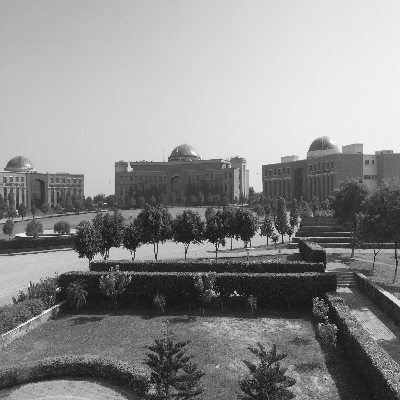

In [41]:
image = cv2.imread('image.jpg',0)
image = cv2.resize(image, (400,400))
show = Image.fromarray(image)
show


## Adding noise Gaussian Noise to the image 

In [42]:
def gaussianNoise(image, variance):
    row,col = image.shape
    noise = image + np.random.normal(0, variance ** 0.5, (row,col))
    final = np.clip(noise, 0, 255)
    return final.astype(np.uint8)

#### Adding Gaussian Noise with variance equals to 100

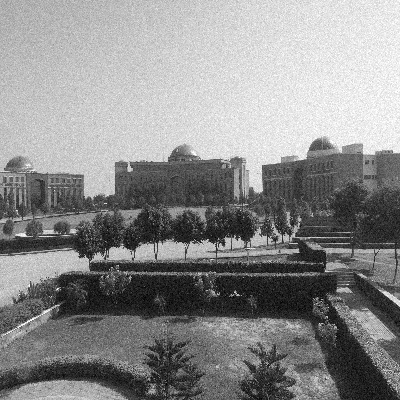

In [43]:
new_image_g1 = gaussianNoise(image, 100)
new_image_g1 = Image.fromarray(new_image_g1)
new_image_g1

#### Adding Gaussian Noise with variance equals to 15

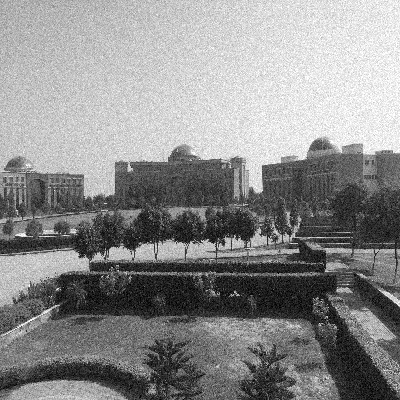

In [44]:
new_image_g2 = gaussianNoise(image, 200)
new_image_g2 = Image.fromarray(new_image_g2)
new_image_g2

## Adding noise Salt and Pepper Noise to the image 

In [45]:
def salt_pepper_noise(image,prob):
    noise = np.zeros(image.shape,np.uint8)
    thres = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                noise[i][j] = 0
            elif rdn > thres:
                noise[i][j] = 255
            else:
                noise[i][j] = image[i][j]
    
    return noise
    
    

#### Adding Salt and Pepper Noise with variance equals to 15

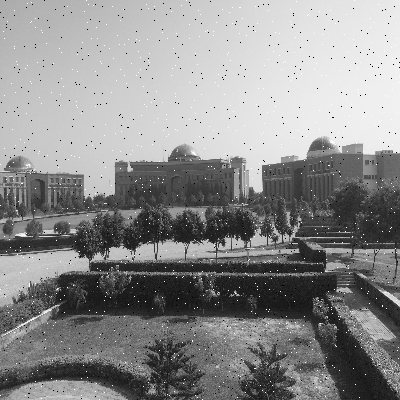

In [46]:
new_image_sp1 = salt_pepper_noise(image,0.005)
new_image_sp1 = Image.fromarray(new_image_sp1)
new_image_sp1

#### Adding Salt and Pepper Noise with variance equals to 15

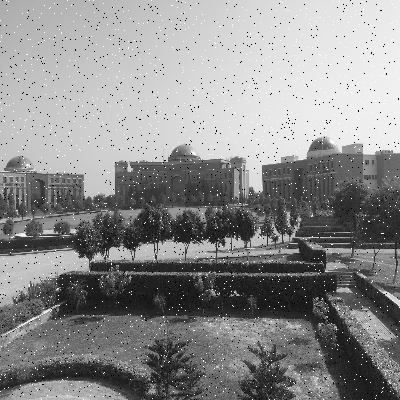

In [47]:
new_image_sp2 = salt_pepper_noise(image,0.01)
new_image_sp2 = Image.fromarray(new_image_sp2)
new_image_sp2

## Recovering the Images

### a. With Arithmatic Filter

#### Applying mean filter to gaussian noise image  with variance 100

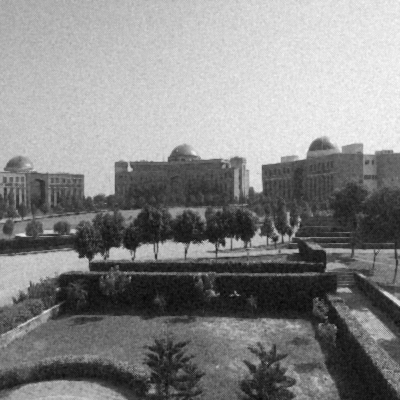

In [48]:
## arithmatic mean filter
selem = disk(1)
percentile_result = rank.mean_percentile(np.array(new_image_g1), selem=selem, p0=.01, p1=.9)
temp = Image.fromarray(percentile_result)
temp

#### Applying mean filter to gaussian noise image  with variance 200

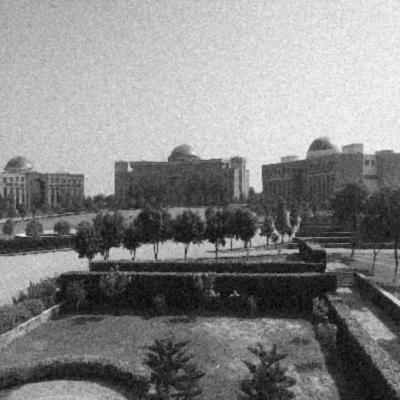

In [49]:
## arithmatic mean filter
selem = disk(1)
percentile_result = rank.mean_percentile(np.array(new_image_g2), selem=selem, p0=.01, p1=.9)
temp = Image.fromarray(percentile_result)
temp

#### Applying mean filter to Salt and Pepper noise image  with prop 0.005

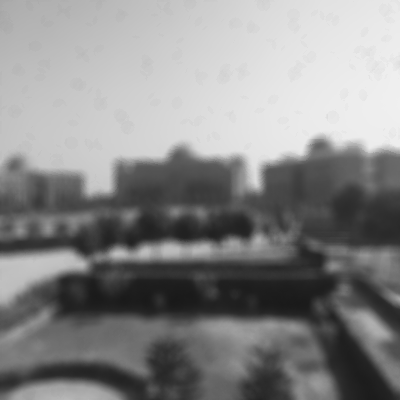

In [50]:
## arithmatic mean filter
selem = disk(7)
percentile_result = rank.mean_percentile(np.array(new_image_sp1), selem=selem, p0=.01, p1=.9)
temp = Image.fromarray(percentile_result)
temp

#### Applying mean filter to Salt and Pepper noise image  with prop 0.01

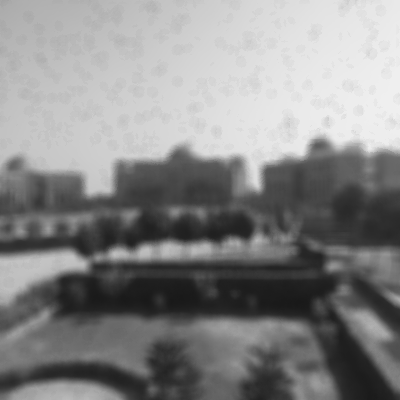

In [51]:
## arithmatic mean filter
selem = disk(6)
percentile_result = rank.mean_percentile(np.array(new_image_sp2), selem=selem, p0=.01, p1=.9)
temp = Image.fromarray(percentile_result)
temp

### c. With Median Filter

#### Applying Median filter to Gaussian noise image of variance 100  with Q = 5

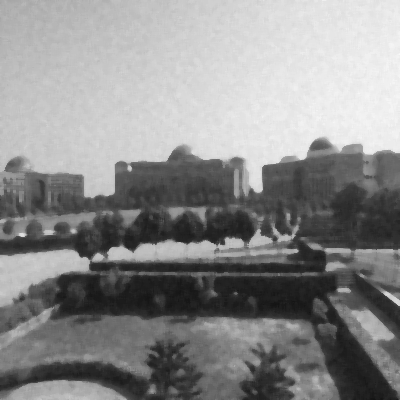

In [13]:
result_g1 = cv2.medianBlur(np.array(new_image_g1), 5)
result_g1  = Image.fromarray(result_g1)
result_g1

#### Applying Median filter to Gaussian noise image of variance 200 with Q = 5

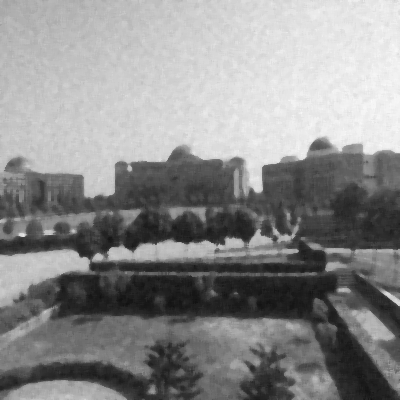

In [14]:
result_g2 = cv2.medianBlur(np.array(new_image_g2), 5)
result_g2  = Image.fromarray(result_g2)
result_g2

#### Applying Median filter to Salt and Paper noise image with prop =  0.005 with Q = 3

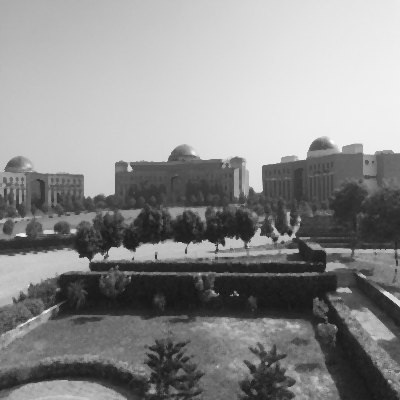

In [15]:
result_g2 = cv2.medianBlur(np.array(new_image_sp1), 3)
result_g2  = Image.fromarray(result_g2)
result_g2

#### Applying Median filter to Salt and Paper noise image with prop =  0.01 with Q = 3

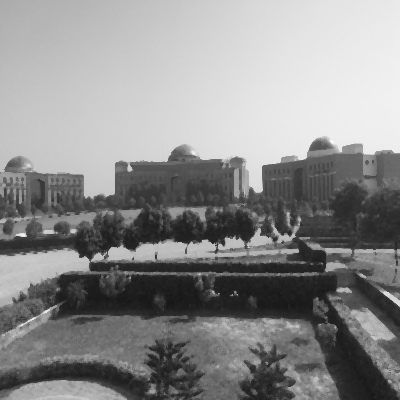

In [16]:
result_g2 = cv2.medianBlur(np.array(new_image_sp2), 3)
result_g2  = Image.fromarray(result_g2)
result_g2

### d. Midpoint filter

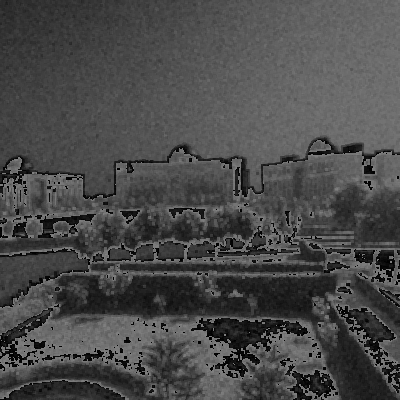

In [68]:
final_img1 = new_image_g1.filter(ImageFilter.MinFilter(size = 3)) 
final_img2 = new_image_g1.filter(ImageFilter.MaxFilter(size = 3)) 
temp1_ar = np.array(final_img1)
temp2_ar = np.array(final_img2)
final = (temp1_ar + temp2_ar)/2
final = final.astype(np.uint8)
Image.fromarray(final)